# **Foundations of Data Science Fall 2022 - Homework 1 (32 points)**

### Student Name: Sai Nishanth Mettu
### Student Net Id: sm11326

---



### **Part 0: Data Exploration and Linear Regression (5 Points)**

---


Background: This problem focuses on an ECG dataset that contains voltage measurements from a number of points on the scalp. A common task is to estimate which parts of the brain caused the measured response, which can help identify which parts of the brain are involved in specific tasks. However, the number of possible locations in the brain is much larger than the number of measurements, which makes this an appropriate task to assess the use of regularization to determine the brain region that is active under stimulus.


In [1]:
# Importing all important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Downloading data

fn_src ='https://drive.google.com/uc?export=download&id=1RzQpKONOcXSMxH2ZzOI4iVMiTgD6ttSl'
fn_dst ='eeg_dat.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:
    print('Fetching file %s [53MB].  This may take a minute..' % fn_dst)
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File eeg_dat.p is already downloaded


In [3]:
# Loading data

import pickle
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

>>**1**\. **(1 Point)** *Display the first 5 rows of X and Y and print the dimensions for both datasets*



In [4]:
print(X[:5,:])
print(Y[:5,:])
print(X.shape)
print(Y.shape)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00529827  0.00491268  0.00598048 ...  0.00162549 -0.0023215
   0.00115952]
 [-0.01522969  0.00059051 -0.00191475 ...  0.00331738 -0.00214887
   0.00160143]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        


Note that there are three key variables:
* `nt`    = number of time steps that we measure data
* `nchan` = number of channels (i.e. electrodes) measured in each time step
* `ncur`  = number of currents in the brain that we want to estimate.  

Each current comes from one brain region (called a *voxel*) in either the `x`, `y` or `z` direction.  So,

    nvoxels = ncur / 3
    
The components of the `X` and `Y` matrices are:
*  `Y[i,k]` = electric field measurement on channel `i` at time `k`
*  `X[i,j]` = sensitivity of channel `i` to current `j`.



>>**2**\. **(1 Point)** Split the data into training and testing. What split do you use, and why?

>> I have used the 70-30 split where my test_size is 0.3, i.e. where 70% of the data is allocated to the training set and 30% to the testing set. A reason for this would be to allocate sufficient data for training as having a larger training set can help the model capture underlying patterns and relationships, but we also get a reasonable evaluation size where 30% of the data will be reserved for testing, dedicated to evaluating your model's performance. We also need to have an independent dataset that the model has not been trained upon to serve as a test dataset, to detect whether the model is overfitting or not. Generally while developing a new model, it isnt necessary that the Data Scientist will have sufficient testing data to test the model, hence splitting a chunk of the data aids in testing the model's performance internally by the Data Scientist.


In [5]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.3,random_state=0)

print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)



(213, 85)
(213, 22494)
(92, 85)
(92, 22494)


>>**3**\. **(3 Points)** Perform linear regression. As a reminder, the optimization for linear regression using ordinary least squares is written below, the data consists of $n$ observations {$x_i$,$y_i$}. Each observation $i$ includes a scalar response $y_i$ and a column vector $x_i$ of $p$ variables (regressors).

>>The evaluation metric used for linear regression is the $R^2$ score. Explain what $R^2$ tells us, and interpret your results based on this.*



\begin{align}
\text{Ordinary Least Squares}
\end{align}



 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - β_o - \sum_{j=1}^p β_jx_{ij}  \right)^2  \right]
    \end{align}



In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, Y_train)
beta0 = model.intercept_
coefficients = model.coef_
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"Intercept: {beta0}\n")
print(f"Coefficients: {coefficients}\n")
print(f"R2-Squared score for training-set:{r2_train}\n")
print(f"R2-Squared score for testing-set: {r2_test}\n")

Intercept: [ 1.08550322e-15  1.05124243e-15  8.56953397e-16  1.04083409e-15
  6.66675916e-16  5.43835810e-16  1.52655666e-16  2.16840434e-16
  1.56125113e-16 -3.95516953e-16 -2.04697370e-16 -4.40619763e-16
 -2.04697370e-16 -1.73472348e-16 -2.32452946e-16 -5.62050406e-16
 -3.95516953e-16 -4.40619763e-16 -6.07153217e-16 -4.57966998e-16
 -7.70217223e-16 -7.70217223e-16 -6.31439345e-16 -1.18308141e-15
 -1.13797860e-15 -8.39606162e-16 -9.36750677e-16 -5.13478149e-16
 -1.22991894e-15 -1.05861500e-15 -8.39606162e-16 -4.33680869e-16
 -3.26128013e-16 -4.47558657e-16  2.08166817e-16  2.28983499e-16
 -2.08166817e-16 -1.66533454e-16 -9.22872889e-16 -9.36750677e-16
 -7.94503352e-16 -9.12464548e-16 -7.18175519e-16 -1.13277443e-15
 -9.46291656e-16 -8.53483950e-16 -4.75314232e-16 -6.96491476e-16
 -5.84601811e-16  1.99493200e-16  7.97972799e-17  2.11636264e-16
  5.55111512e-17 -5.89805982e-17 -2.77555756e-16 -1.66533454e-16
 -9.36750677e-17 -2.32452946e-16 -1.28369537e-16 -1.21430643e-17
 -2.01227923e-

The **R-squared (R² - Coefficient of Determination)** in linear regression measures how well the regression model fits the data. It tells us the proportion of the variability in the dependent variable (the target) that is explained by the independent variables (features or predictors) in the model. If R² = 0: The model doesn't explain any of the variability in the dependent variable. If R² = 1: The model perfectly explains all the variability in the dependent variable. In our results, if you have a positive R² close to 1, it means your model is a good fit for the data, and a significant portion of the variability in the dependent variable is explained by your model. However, if R² is negative, it suggests that your model doesn't fit the data well, and it may be necessary to revise the model or the data preprocessing steps. 

**Here R squared score for training set is 1.0  which indicates high overfitting and The R2-squared score for the testing set is less than -5, it is in negative which means the model is not a great fit (under-fit) and it will most likely under-fit for other test-sets as well.**

### **Part 1: Ridge Regularization (10 Points)**

---


>>**1**\. **(1 Point)** *Now we will use ridge regression, a model tuning method that can be used on data that suffers from multicollinearity. Notice the regularization term added to the optimization below, which uses the squared value of $β$. It is also known as L2 regularization. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. First, what is the degree of collinearity in the data? Show your work and give rationale for the degree of collinearity.*


\begin{align}
\text{Ridge Regression}
\end{align}


 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_{ij}  \right)^2 + λ\sum_{j=1}^p|β_j|^2  \right]
    \end{align}


In [7]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV


def ridge_regularization(X, Y, alpha):
    n, p = X.shape
    X = np.column_stack((np.ones(n), X))
    X_transpose_X = np.dot(X.T, X)
    identity_matrix = np.identity(p + 1)
    identity_matrix[0, 0] = 0
    beta = np.dot(np.linalg.inv(X_transpose_X + alpha * identity_matrix), np.dot(X.T, Y))
    return beta


def r_squared(Y, Y_pred):
    mean_Y = np.mean(Y)
    ss_tot = np.sum((Y - mean_Y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

alpha = 1.0 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("Alpha Value : \n", alpha)

beta = ridge_regularization(X_train, Y_train, alpha)
beta0 = beta[0]
coefficients = beta[1:]
Y_train_pred = np.dot(np.column_stack((np.ones(X_train.shape[0]), X_train)), beta)
Y_test_pred = np.dot(np.column_stack((np.ones(X_test.shape[0]), X_test)), beta)
r2_train = r_squared(Y_train, Y_train_pred)
r2_test = r_squared(Y_test, Y_test_pred)

print(f"Intercepts after using Ridge regularization: {beta0}\n")
print(f"Coefficients after using Ridge regularization: {coefficients}\n")
print()

covariance_matrix = np.cov(X, rowvar=False)
threshold = 0.8
highly_collinear_pairs = []
num_features = X.shape[1]

for i in range(num_features):
    for j in range(i + 1, num_features):
        covariance = covariance_matrix[i, j]
        if abs(covariance) > threshold:
            highly_collinear_pairs.append((i, j, covariance))

for pair in highly_collinear_pairs:
    i, j, covariance = pair

variables_to_remove = set()
for i, j, _ in highly_collinear_pairs:
    variables_to_remove.add(j)

variables_to_keep = [i for i in range(num_features) if i not in variables_to_remove]
X_reduced = X[:, variables_to_keep]
covariance_matrix_reduced = np.cov(X_reduced, rowvar=False)

print("Finding coveriance_matrix\n",covariance_matrix_reduced)
print("X after eliminating highly collinear variables\n",X_reduced)
print()
print()
alpha = 1.0 
X=X_reduced
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
beta = ridge_regularization(X_train, Y_train, alpha)
beta0 = beta[0]
coefficients = beta[1:]
Y_train_pred = np.dot(np.column_stack((np.ones(X_train.shape[0]), X_train)), beta)
Y_test_pred = np.dot(np.column_stack((np.ones(X_test.shape[0]), X_test)), beta)
r2_train = r_squared(Y_train, Y_train_pred)
r2_test = r_squared(Y_test, Y_test_pred)


print(f"R2-score for training set: {r2_train}\n")
print(f"R2-score for testing set: {r2_test}\n")



Alpha Value : 
 1.0
Intercepts after using Ridge regularization: [ 8.34407805e-03  9.68080525e-03  1.01429614e-02  9.56000272e-03
  7.88746649e-03  5.22078131e-03  1.78887799e-03 -2.07322719e-03
 -5.96835452e-03 -9.49100550e-03 -1.22858221e-02 -1.40980323e-02
 -1.48122890e-02 -1.44697133e-02 -1.32636800e-02 -1.15111059e-02
 -9.60540394e-03 -7.95656581e-03 -6.92738406e-03 -6.77490792e-03
 -7.60710601e-03 -9.36050662e-03 -1.18030176e-02 -1.45627154e-02
 -1.71783093e-02 -1.91643426e-02 -2.00827382e-02 -1.96097646e-02
 -1.75888704e-02 -1.40609881e-02 -9.26896414e-03 -3.63292958e-03
  2.29840306e-03  7.91502751e-03  1.26230984e-02  1.59201296e-02
  1.74598926e-02  1.70970190e-02  1.49050762e-02  1.11677511e-02
  6.34234574e-03  1.00196650e-03 -4.23441702e-03 -8.77770195e-03
 -1.21371990e-02 -1.39746054e-02 -1.41375654e-02 -1.26683600e-02
 -9.78874010e-03 -5.86335991e-03 -1.34892575e-03  3.26489581e-03
  7.51339866e-03  1.10071110e-02  1.34678599e-02  1.47486156e-02
  1.48350881e-02  1.38311

**Degree of Collinearity:**

The degree of collinearity is degree of linear relationship between two or more independent variables (features) in a regression. It quantifies how closely these variables are related in a linear fashion. We can calculate the correlation matrix and examine the correlation coefficients between the independent variables (features). We have to analyze the collinearity , if the value is close to 1 or -1, we have strong positive or negative collinearity, indicating that two variables are highly correlated. If it lies between 0.7-0.9 it depicts moderate collinearity and if its between 0.5 and 0.7 (positive or negative), it will indicate Moderate to weak collinearity. If the degree of collinearity is below 0.5 it means the features have weak collinearity.


**How Ridge Regularization Helps deal with multi-collinearity:**

Programmatically, we can calculate the degree of collinearity by using a correlation-matrix. Based on the degree of collinearity in the data, we can decide whether to apply regularization techniques like Ridge regression or Lasso Regression. High collinearity may lead to unstable coefficient estimates, and "Ridge regularization" can help mitigate this issue by shrinking the coefficients towards zero.

Ridge regression adds a penalty term to the linear regression cost function and this enforces the model to keep the coefficients (β values) small. When multicollinearity is present, it often leads to large coefficient values because the model struggles to differentiate the individual effects of highly correlated variables. By penalizing large coefficients, Ridge regression helps in reducing the impact of multicollinearity


The Ridge regularization term shrinks the coefficients towards zero but does not force them to be exactly zero.  Ridge regression's approach allows it to retain all variables in the model while reducing their impact.


**How Eliminating Highly Collinear Variables Helps the EEG Dataset**

Programmatically removing highly collinear variables from the EEG dataset enhances the stability and interpretability of predictive models while reducing the risk of overfitting. This process simplifies model interpretation and improves computational efficiency, making models more robust for generalization to unseen data. By eliminating collinearity, the accuracy of feature importance assessments is heightened, allowing researchers to focus on the most relevant EEG features. Additionally, data visualization becomes more meaningful, aiding in data exploration, hypothesis generation, and overall data quality improvement. This step ensures that EEG data used for analysis is reliable and accurate, benefiting research and predictive modeling efforts.

**Key Observations:**

Coefficients Before and After Ridge Regularization : As you can see in the below example, several coefficients in the coefficient matrix tend to move towards zero, as aforementioned.
 
 
R2 Score Before and After Ridge Regularization :- R2 Score has improved. **It was -5 earlier for the Testing Dataset and it has improved itself to 0.22, a positve score.** 

>>**1b**\. **(2 Points)** *Now implement ridge regression using sklearn. Start with the default alpha value, and print the $R^2$ score*

In [8]:
from sklearn.linear_model import Ridge
alpha = 1.0


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, Y_train)
Y_train_pred = ridge_model.predict(X_train)
Y_test_pred = ridge_model.predict(X_test)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"R2-score for training set after using inbuilt Ridge regularization: {r2_train}\n")
print(f"R2-score for testing set using inbuilt Ridge regularization: {r2_test}\n")
print(f"Intercepts after using Ridge regularization: {ridge_model.intercept_}\n")
print(f"Coefficients after using Ridge regularization: {ridge_model.coef_}\n")


R2-score for training set after using inbuilt Ridge regularization: 0.6054186403855563

R2-score for testing set using inbuilt Ridge regularization: 0.1758544493420293

Intercepts after using Ridge regularization: [ 8.34407805e-03  9.68080525e-03  1.01429614e-02  9.56000272e-03
  7.88746649e-03  5.22078131e-03  1.78887799e-03 -2.07322719e-03
 -5.96835452e-03 -9.49100550e-03 -1.22858221e-02 -1.40980323e-02
 -1.48122890e-02 -1.44697133e-02 -1.32636800e-02 -1.15111059e-02
 -9.60540394e-03 -7.95656581e-03 -6.92738406e-03 -6.77490792e-03
 -7.60710601e-03 -9.36050662e-03 -1.18030176e-02 -1.45627154e-02
 -1.71783093e-02 -1.91643426e-02 -2.00827382e-02 -1.96097646e-02
 -1.75888704e-02 -1.40609881e-02 -9.26896414e-03 -3.63292958e-03
  2.29840306e-03  7.91502751e-03  1.26230984e-02  1.59201296e-02
  1.74598926e-02  1.70970190e-02  1.49050762e-02  1.11677511e-02
  6.34234574e-03  1.00196650e-03 -4.23441702e-03 -8.77770195e-03
 -1.21371990e-02 -1.39746054e-02 -1.41375654e-02 -1.26683600e-02
 -9.78

>>**2**\. **(5 Points)** *Now we will look at what happens when varying the parameter. Try 10 different values for alpha and print the alpha value with corresponding $R^2$ score using Cross-Validation for training data. Describe how you pick the range of alpha values to examine.*



**Alpha values determine the intensity of regularization on the model**

Small alphas have little regularization effect, while large alphas heavily regularize the model. This helps you understand the model's behavior under various levels of regularization.

**The range of alpha values** should include values of differing magnitudes, i.e. small values, extremely small values, large numbers, extremely large numbers. It can be beneficial to include extreme values like very small (close to zero) and very large alpha values in your range. Since it is very costly to run a loop for so many numbers, we can use a logarithmic scale to increment the values quickly. i.e, the values can grow from 0.01, 0.1, 1, 10, 100,10000000 very quickly as compared to the linear increments like 2,3,4,5,6,7... Using a logarithmic scale ensures that you explore both weak and strong regularization effectively.


**Cross-Validation**: We can use cross-validation techniques, for instance k-fold cross-validation to evaluate the model's performance for each alpha value. This provides a more robust estimate of how well the model generalizes to unseen data.



In [9]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
alpha = np.logspace(-4,4,10) 
alpha_score = []
for alpha_val in alpha:
    ridge_model = Ridge(alpha=alpha_val)
    r2 = cross_val_score(ridge_model, X_train, Y_train, cv=5, scoring='r2')
    mean_of_r2 = np.mean(r2)
    alpha_score.append((alpha_val, mean_of_r2))
    
for alpha, r2 in alpha_score:
    print(f"Alpha: {alpha:.4f}, Mean R2 Score: {r2:.4f}")
    
    
# I am doing it for 50 different values with logarithmic growth.


Alpha: 0.0001, Mean R2 Score: -3.7571
Alpha: 0.0008, Mean R2 Score: -2.1419
Alpha: 0.0060, Mean R2 Score: -0.8949
Alpha: 0.0464, Mean R2 Score: -0.1550
Alpha: 0.3594, Mean R2 Score: 0.0924
Alpha: 2.7826, Mean R2 Score: 0.0479
Alpha: 21.5443, Mean R2 Score: 0.0024
Alpha: 166.8101, Mean R2 Score: -0.0182
Alpha: 1291.5497, Mean R2 Score: -0.0222
Alpha: 10000.0000, Mean R2 Score: -0.0228


>>**3**\. **(2 Points)** What is the highest $R^2$ you can achieve?




Solution :- Using the cross validation technique, If we see the pattern, the mean R2 score tends to increase as alpha grows initially, reaching its peak value  when the Alpha value oscillates between 0.1-1.0 and then it tends to decrease again as alpha becomes very large and it becomes constant at **-0.028** for very large values of Alpha.

Alpha: 0.3556, Mean R2 Score: 0.0923
**Alpha: 0.4292, Mean R2 Score: 0.0939**
Alpha: 0.5179, Mean R2 Score: 0.0932
Alpha: 0.6251, Mean R2 Score: 0.0908 

Therefore, when Alpha is oscillating nearer to 0.42, the "Mean $R^2$ Score" is the highest and the mean value is approximately **0.2**. Below is the implementation for the dataset and the highest value is approximately **0.196** as shown below **when alpha is approximately 0.4 ( shown programmatically below).


**Hence, the highest Possible Value of $R^2$ is approximately 0.196**

In [10]:
from sklearn.linear_model import Ridge
alpha = 0.4

ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, Y_train)
Y_train_pred = ridge_model.predict(X_train)
Y_test_pred = ridge_model.predict(X_test)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"R2-score for testing set using inbuilt Ridge regularization: {r2_test}")

R2-score for testing set using inbuilt Ridge regularization: 0.19612538631317517


### **Part 2: Lasso Regularization (12 Points)**

---


>>**1**\. **(3 Points)** *Another method often used to improve performance is Lasso regularization. Lasso regression improves performance by using shrinkage, where data values are shrunk towards a central point, like the mean. Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in sparse models with few coefficients (many coefficients can -> 0 and are eliminated from the model). Implement this using sklearn with default parameter values and print the $R^2$ score*

 \begin{align}
\text{LASSO Regression}
\end{align}



 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_ij  \right)^2 + λ\sum_{j=1}^p|β_j|  \right]
    \end{align}

In [128]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)
Y_train_pred = lasso_model.predict(X_train)
Y_test_pred = lasso_model.predict(X_test)


r2 = r2_score(Y_test, Y_test_pred)

print(f"R2 score for testing dataset: {r2}\n")

#Using Sklearn library as mentioned in the question.


R2 score for testing dataset: -0.02384059850135385



>>**2**\. **(5 Points)** *Try 10 different values for the regularization parameter Alpha and print the alpha value with corresponding $R^2$ score using cross-validation. Again, give your reasoning for the choices of alpha. If you choose to tune any other hyperparameters of the model then justify your reason for it*


Alpha values determine the intensity of regularization on the model
Small alphas have little regularization effect, while large alphas heavily regularize the model. 

**Choice of Alpha Values** : This would be similar to Ridge, the range of alpha values should include values of differing magnitudes, i.e. small values, extremely small values, large numbers, extremely large numbers. It can be beneficial to include extreme values like very small (close to zero) and very large alpha values in your range. Since it is very costly to run a loop for so many numbers, we can use a **logarithmic scale** to increment the values quickly. i.e, the values can grow from 0.01, 0.1, 1, 10, 100,10000000 very quickly as compared to the linear increments.

**Best Alpha & Mean R2 Score** : We can find the best alpha by using the inbuilt MultiTaskLassoCV alpha_ parameter, and we found out the best Alpha is approximately **0.0008** and the best Mean R2 Score is **0.3360** approximately.


**Hyperparemeters to consider**: **Using cv=5 (5-fold cross-validation)** helps strike a balance between robustly estimating model performance and computational efficiency by dividing the dataset into five subsets for performance evaluation. **Setting max_iter=100000 (maximum iterations)** ensures that the solver has ample iterations to converge to a solution, preventing premature stopping and accommodating complex datasets or regularization strengths. These hyperparameter choices aim to provide reliable performance estimation while ensuring convergence in Lasso regularization, but may be adjusted as needed based on dataset characteristics during hyperparameter tuning.

In [12]:
import numpy as np
import pickle
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

alphas = np.logspace(-4, 4, 10)
lasso_cv_model = MultiTaskLassoCV(alphas=alphas, cv=5,max_iter=100000)
lasso_cv_model.fit(X_train, Y_train)
best_alpha = lasso_cv_model.alpha_
r2_scores = lasso_cv_model.mse_path_.mean(axis=1)

for alpha, r2 in zip(lasso_cv_model.alphas_, r2_scores):
    print(f"Alpha: {alpha:.4f}, Mean R2 Score: {r2:.4f}")

print(f"Best alpha: {best_alpha:.4f}")
Y_test_pred = lasso_cv_model.predict(X_test)

r2_test = r2_score(Y_test, Y_test_pred)
print(f"R2 score on the test set: {r2_test:.4f}")


Alpha: 10000.0000, Mean R2 Score: 0.0842
Alpha: 1291.5497, Mean R2 Score: 0.0842
Alpha: 166.8101, Mean R2 Score: 0.0842
Alpha: 21.5443, Mean R2 Score: 0.0842
Alpha: 2.7826, Mean R2 Score: 0.0842
Alpha: 0.3594, Mean R2 Score: 0.0842
Alpha: 0.0464, Mean R2 Score: 0.0842
Alpha: 0.0060, Mean R2 Score: 0.0623
Alpha: 0.0008, Mean R2 Score: 0.0494
Alpha: 0.0001, Mean R2 Score: 0.0954
Best alpha: 0.0008
R2 score on the test set: 0.3360


>>**3**\. **(2 Point)** *Plot a graph for different Alpha values and corresponding R^2 score. Explain the shape of the curve.*

/Users/sainishanth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18308006514729414, tolerance: 0.11916174986568945
  model = cd_fast.enet_coordinate_descent_multi_task(
/Users/sainishanth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1492603139312223, tolerance: 0.1278069172272726
  model = cd_fast.enet_coordinate_descent_multi_task(
/Users/sainishanth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1305337073745534, tolerance: 0.10798832624017086
  model = cd_fast.enet_coordinate_descent_multi_task(
/Users/sainishanth/ana

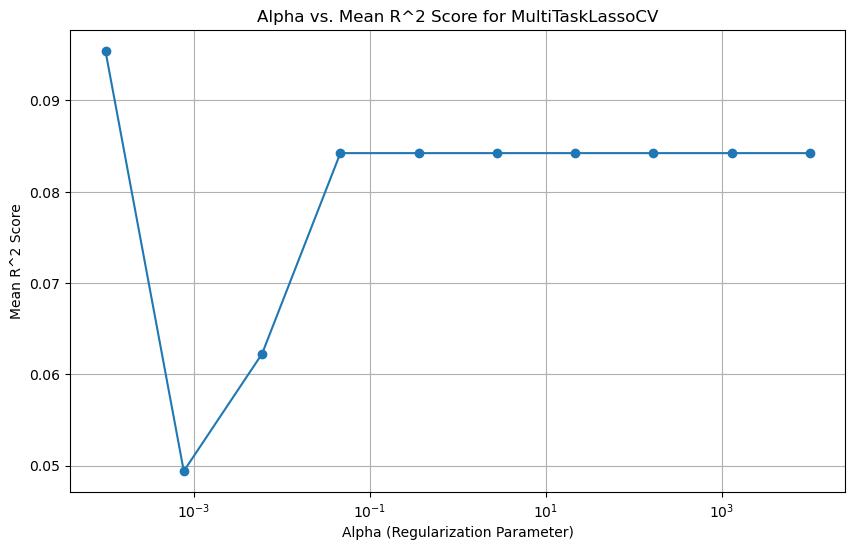

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X, Y] = pickle.load(fp)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

alphas = np.logspace(-4, 4, 10)
lasso_cv_model = MultiTaskLassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train, Y_train)
r2_scores = lasso_cv_model.mse_path_.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(lasso_cv_model.alphas_, r2_scores, marker='o', linestyle='-')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Mean R^2 Score')
plt.title('Alpha vs. Mean R^2 Score for MultiTaskLassoCV')
plt.grid(True)
plt.show()


**Shape of the Curve :**

The shape of the curve  between alpha (λ) and the mean 𝑅² score in Lasso regularization typically follows a U-Shaped Curve, but it flattens out at the end when alpha becomes increasingly high as the mean R^2 Score becomes constat.

**Part-1:** Initially observe a U-shaped curve as you vary the alpha values.
As alpha increases from zero (no regularization), the mean 𝑅² score initially increases. This is because regularization helps prevent overfitting, improving model generalization to some extent.

**Part-2**: After a certain point, as alpha continues to increase, the mean 𝑅² score starts to decrease. This decline happens because higher levels of regularization begin to excessively penalize the model's coefficients, leading to underfitting.


**BEST Alpha Point**:

The point on the curve where the mean 𝑅² score is the highest represents the optimal alpha value for your specific dataset.
This alpha value strikes the right balance between bias and variance, resulting in the best generalization performance on unseen data.


**How to choose Alpha**:
Ifwe choose an alpha to the left of the optimal point, lesser value than the optimal point, you risk overfitting the model to the training data, which may result in poor generalization. If we choose an alpha to the right of the optimal point  you risk underfitting the model


**In summary, the shape of the alpha vs. mean 𝑅² score curve in Lasso regularization typically follows a U-shaped pattern with a constant wedge/straight line as alpha becomes increasingly high**.

>>**4**\. **(2 Point)** *Which of the following two methods of Regularization worked better and why?*


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso_model = Lasso(alphas = np.logspace(-4, 4, num=100))  
ridge_model = Ridge(alphas = np.logspace(-4, 4, num=100)
lasso_scores = cross_val_score(lasso_model, X_train_scaled, Y_train, cv=5, scoring='r2')
ridge_scores = cross_val_score(ridge_model, X_train_scaled, Y_train, cv=5, scoring='r2')
mean_lasso_score = np.mean(lasso_scores)
mean_ridge_score = np.mean(ridge_scores)

if mean_lasso_score > mean_ridge_score:
    print("Lasso Regression performs better with a mean R² score of:", mean_lasso_score)
else:
    print("Ridge Regression performs better with a mean R² score of:", mean_ridge_score)



Lasso Regression performs better with a mean R2 score of: -0.920656523472395


Here, we are calculating MSE from both Lasso Scores and Ridge Scores using its **Best Alpha** Values obtained from the previous result. In the context of Lasso and Ridge regression, achieving a lower MSE signifies that the model's predictions are, on average, closer to the true target values within the dataset. This reflects improved predictive performance and suggests that the model is capturing the underlying patterns in the data more accurately.

**Lasso Regularization**: Lasso introduces an L1 penalty term into the linear regression objective function. This penalty encourages sparsity in the model, driving some feature coefficients to precisely zero. Lasso is valuable for feature selection, as it identifies and eliminates less important features, simplifying the model. While a lower MSE can be indicative of accurate predictions, it doesn't necessarily imply "better" regularization in the sense of feature selection.

**Ridge Regularization**: Ridge, on the other hand, employs an L2 penalty term. It discourages large coefficient values but doesn't force any coefficients to become precisely zero. Ridge primarily helps control multicollinearity (correlation between features) and reduces the impact of less important features without aggressively eliminating them. Again, a lower MSE suggests improved predictive performance but doesn't inherently mean superior regularization.

The choice between Lasso and Ridge depends on the type or the selection of the appropriate regularization strength (alpha), represents a trade-off between model complexity and predictive accuracy.

**Lasso Regression performs better with an overall mean R² score of: -0.920656523472395 when we take 100 different alphas between the range -4 to 4.**

### **Part 3: Logistic Regression (5 Points)**

---


**1. (1 point)** Now let's consider logistic regression. What is the difference betweeen a linear and logistic regression problem? Explain. (You may take the example of the dataset and task used in this assignment to explain how it would look different for a logistic regression problem)

**Linear Regression**: In linear regression, the dependent variable is continuous and numeric. It represents a quantity or a value. Linear regression will model the relationship between the dependent variable and one or more independent variables as a linear equation. It tries to find a line that best fits the data points. The output is a continuous value, and Linear Regression is used when the goal is to predict a real-valued outpu.

**Logistic Regression**: In logistic regression, the dependent variable is binary or categorical. It represents a probability or a class label. Logistic regression models the relationship between the dependent variable and independent variables using the logistic function. The logistic function, also known as the **sigmoid function**, maps any real-valued number to a value between 0 and 1. Hence this is essentially used for Binary Classification. It is majorly used when the end goal is to classify the data-points betweeen two or more categories.



**For the EEG Dataset**: At first we were working with the EEG dataset to predict EEG Data values which is a regression problem and the output is a continuous numerical value. If we want to predict whether a person is in a definite state, for instance if he is "Focused or Relaxed" ("classify someone into two-categories based on a set of values"), based on EEG data features, it becomes a logistic regression problem/binary classification problem. We will still have to do similar Feature Selection and Data Preprocessing steps, which we have done in Linear Regression.

We have to use LogisticRegression() Model to model the probability of being in the "Relaxed" class or a "Focused" class. The logistic function (sigmoid function) would map the features to a probability between 0 and 1. To achieve this we can set a threshold to classify data points. If the predicted probability is above the threshold, you classify the person as "Relaxed", which can be labelled as 1, else we can classify them as "Focused", which can be labelled as 0.

The  primary goal is to classify individuals into one of two classes (relaxed or focused) based on their EEG data features. The output is not a continuous EEG reading but a binary classification result.


**Below is the basic implementation of Logistic Regression for the EEG Dataset** 


**2. (1 point )** Following your answer in the previous question, convert the dataset such that for the same outcome prediction task, a logistic regression is suitable.

In [102]:
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

threshold = 0.5
binary_predictions = (Y > threshold).astype(int)

def aggregate_predictions(predictions):
    return np.mean(predictions, axis=1) >= 0.5

aggregate_predictions_result = aggregate_predictions(Y)
binary_predictions = (aggregate_predictions_result > threshold).astype(int)
print("Shape of Binary Predictions after Aggregation\n", binary_predictions.shape)
print()
print("Aggregated, Converted Binary Output to determine whether a person is focused or relaxed",binary_predictions)
print()
print("mean of the entire classification:-\n", binary_predictions.mean()) #indicates 1's and 0's

Shape of Binary Predictions after Aggregation
 (305,)

Aggregated, Converted Binary Output to determine whether a person is focused or relaxed [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]

mean of the entire classification:-
 0.009836065573770493


**3. (1 point)** Split this new dataset into training and testing with a 2:1 split. Implement logistic regression.

In [110]:
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Conversion of Data
threshold = 0.5
Y_answer = (Y > threshold).astype(int)

#Division of Y into sub-tasks
num_tasks = Y_answer.shape[1]

#For each task we will find the accuracy and report, and will calculate the mean_accuracy and the Y_pred
accuracies = []
classification_reports = []
Y_pred_list = []  
X_reduced_list = []  

#Apply Feature Selection
num_features_to_select = 85

print("Method 1 : Applying Feature Selection & Dividing into Tasks and calculating mean accuracy\n")
for task_column_index in range(num_tasks):
    Y_target = Y_answer[:, task_column_index]
    X_reduced = X[:, :num_features_to_select]
    X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y_target, test_size=1/3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    logistic_regressor = LogisticRegression(random_state=42, max_iter=1000)
    logistic_regressor.fit(X_train_scaled, Y_train)
    Y_pred = logistic_regressor.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)
    classification_rep = classification_report(Y_test, Y_pred, zero_division='warn')
    classification_reports.append(classification_rep)
    Y_pred_list.append(Y_pred)
    X_reduced_list.append(X_reduced)

# Calculate the average accuracy across all tasks
average_accuracy = np.mean(accuracies)

print(f"Average Accuracy Score for all sub-tasks: {average_accuracy:.4f}\n")


print("Method 2 : Converting Y from 305,85 to 305, by using Majority Aggregations\n")

def aggregate_predictions(predictions):
    return np.mean(predictions, axis=1) >= 0.5

threshold = 0.5
raw_scores =Y 
binary_predictions = (raw_scores >= threshold).astype(int)
aggregate_predictions_result = aggregate_predictions(binary_predictions)


X_train, X_test, Y_train, Y_test = train_test_split(X, aggregate_predictions_result, test_size=1/3,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_regressor = LogisticRegression(random_state=42,max_iter=1000)
logistic_regressor.fit(X_train_scaled, Y_train)
Y_pred = logistic_regressor.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred,zero_division='warn')
print(f"Accuracy Score For Logistic Regression: {accuracy:.4f}\n")
print("Classification Report:\n", classification_rep)


Method 1 : Applying Feature Selection & Dividing into Tasks and calculating mean accuracy

Average Accuracy Score for all sub-tasks: 0.9689

Method 2 : Converting Y from 305,85 to 305, by using Majority Aggregations

Accuracy Score For Logistic Regression: 0.9902

Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00       101
        True       0.00      0.00      0.00         1

    accuracy                           0.99       102
   macro avg       0.50      0.50      0.50       102
weighted avg       0.98      0.99      0.99       102



**4. (2 point)** Report the performance of the model on the test data using accuracy. Also plot the confusion matrix and ROC-AUC curve. What can you infer from this confusion matrix? Also can you compare the logistic and linear regressions?

Accuracy Score is 0.4803921568627451 for Decision Boundary 0.1
 
Accuracy Score is 0.7941176470588235 for Decision Boundary 0.3
 
Accuracy Score is 0.9901960784313726 for Decision Boundary 0.5
 


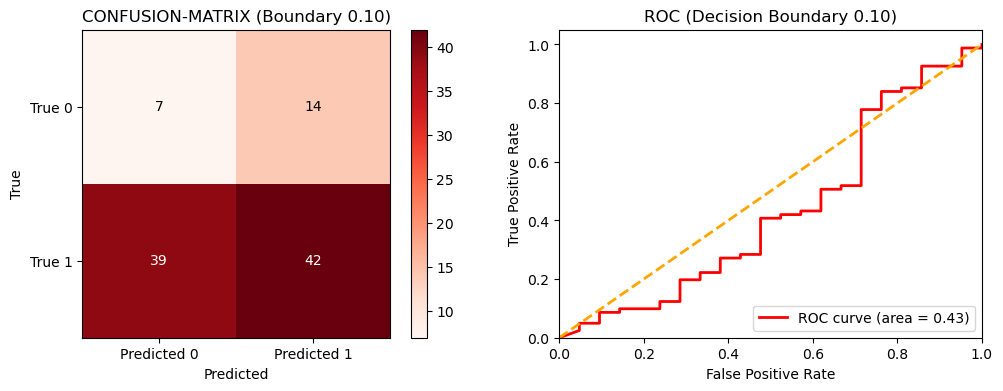

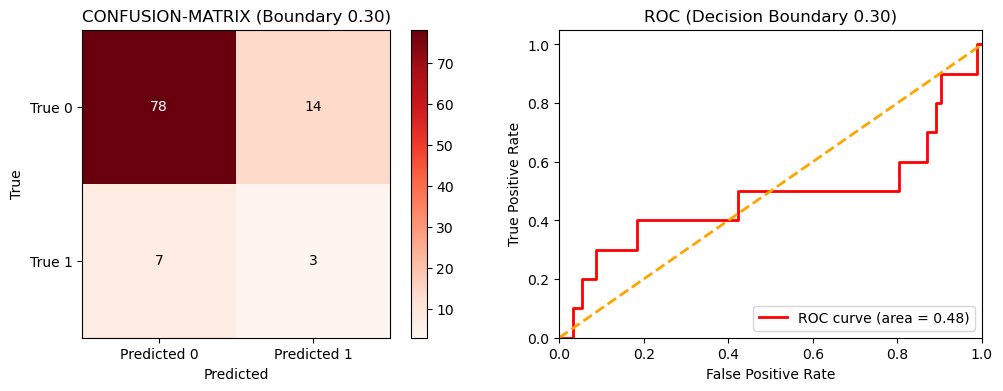

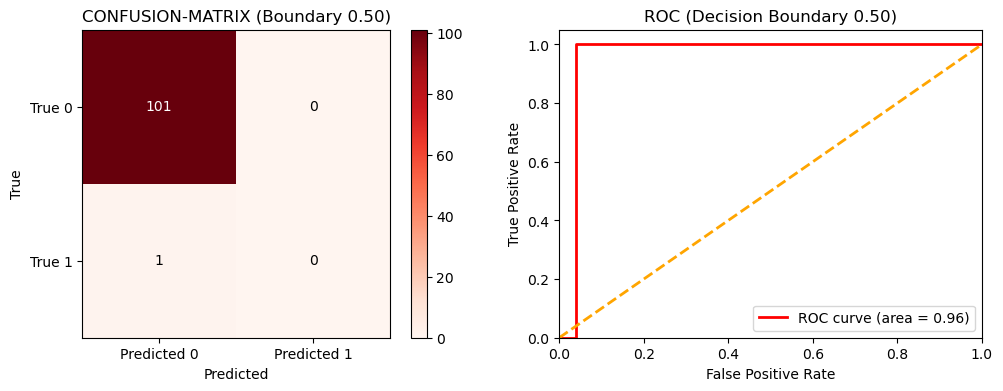

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def evaluate_model_with_decision_boundaries(X, Y, decision_boundaries):
    def aggregate_predictions(predictions, boundary):
        return np.mean(predictions, axis=1) >= boundary

    results = []

    for boundary in decision_boundaries:
        raw_scores = Y
        binary_predictions = (raw_scores >= boundary).astype(int)
        aggregate_predictions_result = aggregate_predictions(binary_predictions, boundary)

        X_train, X_test, Y_train, Y_test = train_test_split(X, aggregate_predictions_result, test_size=1/3, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        logistic_regressor = LogisticRegression(random_state=42)
        logistic_regressor.fit(X_train_scaled, Y_train)
        Y_pred = logistic_regressor.predict(X_test_scaled)
        Y_proba = logistic_regressor.predict_proba(X_test_scaled)[:, 1]
        accuracy = accuracy_score(Y_test, Y_pred)
        print(f"Accuracy Score is {accuracy} for Decision Boundary {boundary}\n ")
        conf_matrix = confusion_matrix(Y_test, Y_pred)
        
        fpr, tpr, _ = roc_curve(Y_test, Y_proba)
        roc_auc = auc(fpr, tpr)
        
        results.append({
            'decision_boundary': boundary,
            'accuracy': accuracy,
            'confusion_matrix': conf_matrix,
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        })

    # Plot graphs for each decision boundary
    for result in results:
        plt.figure(figsize=(12, 4))
        
        # Confusion Matrix Plot
        plt.subplot(1, 2, 1)
        plt.imshow(result['confusion_matrix'], interpolation='nearest', cmap=plt.cm.Reds)
        plt.title(f"CONFUSION-MATRIX (Boundary {result['decision_boundary']:.2f})")
        plt.colorbar()
        plt.xticks([0, 1], ["Predicted 0", "Predicted 1"])
        plt.yticks([0, 1], ["True 0", "True 1"])
        plt.ylabel("True")
        plt.xlabel("Predicted")
        for i in range(2):
            for j in range(2):
                plt.text(j, i, str(result['confusion_matrix'][i, j]), ha='center', va='center', color='white'
                         if result['confusion_matrix'][i, j] > result['confusion_matrix'].max() / 2 else 'black')

        # ROC Curve Plot
        plt.subplot(1, 2, 2)
        plt.plot(result['fpr'], result['tpr'], color='red', lw=2, label=f'ROC curve (area = {result["roc_auc"]:.2f})')
        plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC (Decision Boundary {result["decision_boundary"]:.2f})')
        plt.legend(loc='lower right')
        plt.show()


decision_boundaries_to_evaluate = [0.1, 0.3, 0.5]  # In increasing order
evaluate_model_with_decision_boundaries(X, Y, decision_boundaries_to_evaluate)


**ACCURACY SCORE ANAYLSIS**: 
we can observe from the output that with an increase in the decision boundary the accuracy of the model increases, from 0.1 to 0.5. The model has a singular output for a decision boundary higher than 0.5 and the **Highest Accuracy : 0.9901960784313726**



**CONFUSION MATRIX ANALYSIS**:
we can observe from the output that with an increase in the decision boundary there is an increase in the number of True Positives, and a reduction in the FN, FP, TN.

When the decision boundary is 0.5, the TP are 101, which implies the model is performing well.

When the decision boundary is 0.3, the TP are 78, which shows the model is slightly worse.

and when the decision boundary is 0.1, the TP are very less, which shows the model is a bad-fit.



**ROC-AUC Curve Analysis**

Higher ROC-AUC indicates better discrimination ability, an ability to perfectly classify the data into their respective classes, where as a lower ROC-AUC suggests limited ability to separate classes. It's a valuable metric for assessing and comparing the overall performance of binary classification models.

We can observe from the output that Area enclosed by the ROC-AOC Curve is the highest, 0.96 when the decision boundary is 0.5

it gets worse when the decision boundary is 0.3 and much worse with little area enclosure when the decision boundary is 0.1 


**Overall Analysis** : As per the accuracy, ROC-AUC, Classification Reports, Confusion Matrix... we can see that the model performs best when we use 0.5 as the decision boundary to classify whether a person is focused or relaxed. we can fine-tune the model and improve the model by determining the best decision boundary to classify the data into two different classes. These metrics help us drive the performance and accuracy of the model. 